In [1]:
import matplotlib.pyplot as plt

In [2]:
import numpy as np

In [4]:
!pip install pandas

  Obtaining dependency information for pandas from https://files.pythonhosted.org/packages/8f/bb/aea1fbeed5b474cb8634364718abe9030d7cc7a30bf51f40bd494bbc89a2/pandas-2.0.3-cp311-cp311-macosx_11_0_arm64.whl.metadata
  Using cached pytz-2023.3-py2.py3-none-any.whl (502 kB)
  Using cached tzdata-2023.3-py2.py3-none-any.whl (341 kB)
Using cached pandas-2.0.3-cp311-cp311-macosx_11_0_arm64.whl (10.7 MB)


In [5]:
import pandas as pd

In [90]:
# %load ..helper_funcs/get_df.py
def get_df(yr):
    return pd.read_csv('/Users/evie/Dropbox/Mac/Desktop/Ex_Files_Introducing_Jupyter/datafiles/inputs/Environmental_Data_Deep_Moor_{}.csv'.format(yr))


In [91]:
# %load ..helper_funcs/line_helpers.py
def monthly_avg_calc(mo,col):
    return df[df['date'].str.contains('201[2345]_[0]?'+ str(mo))][col].mean()

In [92]:
def yearly_avg(category):
    return list(map(lambda m: monthly_avg_calc(m, category), range(1,13)))

In [93]:
df = get_df('2014')

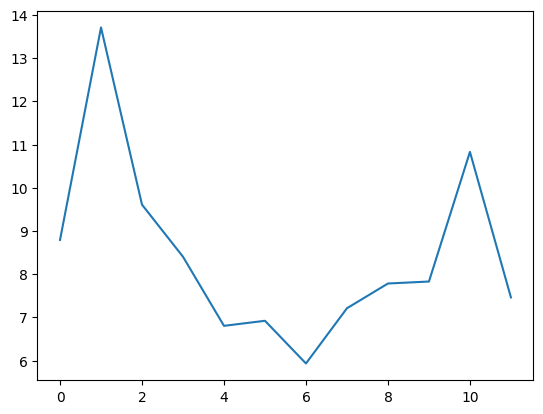

In [94]:
plt.plot(yearly_avg('Wind_Speed'))
plt.show()

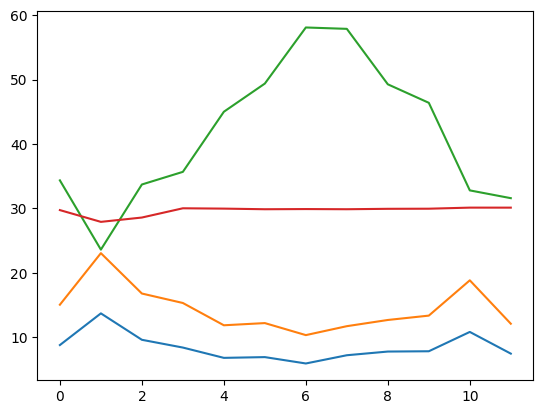

In [95]:
plt.plot(yearly_avg('Wind_Speed'))
plt.plot(yearly_avg('Wind_Gust'))
plt.plot(yearly_avg('Dew_Point'))
plt.plot(yearly_avg('Barometric_Press'))
plt.show()

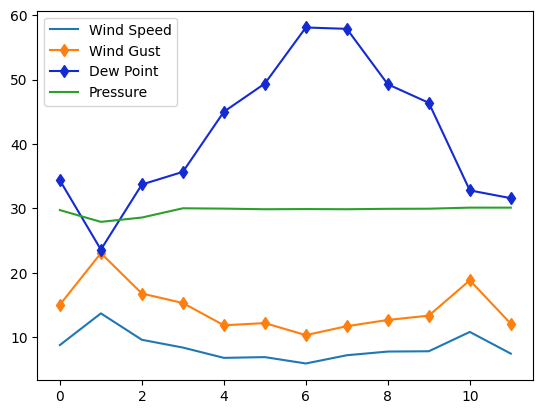

In [96]:
plt.plot(yearly_avg('Wind_Speed'),label='Wind Speed')
plt.plot(yearly_avg('Wind_Gust'), 'd-',label='Wind Gust')
plt.plot(yearly_avg('Dew_Point'), 'd-',label='Dew Point', color='#142BD3FF')
plt.plot(yearly_avg('Barometric_Press'),label='Pressure')
plt.legend()
plt.show()

In [97]:
# %load ../helper_funcs/get_seasons.py
def get_seasons(yr):
    df = get_df(yr)
    return [df[df['date'].between('{}_03_20'.format(yr),'{}_06_19'.format(yr))],
            df[df['date'].between('{}_06_20'.format(yr),'{}_09_21'.format(yr))],
            df[df['date'].between('{}_09_22'.format(yr),'{}_12_20'.format(yr))],
            df[~df['date'].between('{}_03_20'.format(yr),'{}_12_20'.format(yr))]]

In [98]:
seasons = ["Spring","Summer","Fall","Winter"]
heights = [season['Air_Temp'].mean() for season in get_seasons('2013')]

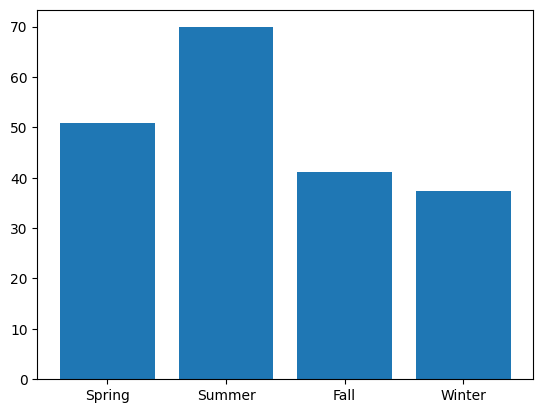

In [99]:
plt.bar(seasons,heights)
plt.show()

In [100]:
alphas = [height/max(heights) for height in heights]
colors = [(.1,.7,.2,a) for a in alphas]

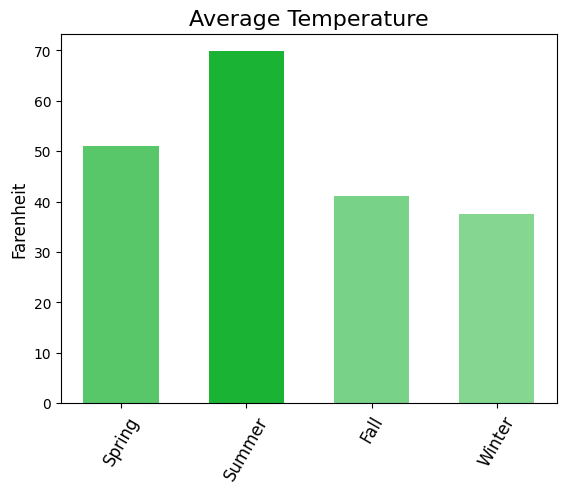

In [101]:
plt.bar(seasons,heights, .6, color = colors)
plt.ylabel('Farenheit',fontsize=12)
plt.title('Average Temperature',fontsize=16)
plt.xticks(rotation=60,fontsize=12)
plt.show()

In [106]:
heights14 = [season['Air_Temp'].mean() for season in get_seasons('2014')]
alphas14 = [height/max(heights) for height in heights14]
colors14 = [(.2,.1,.7,a) for a in alphas14]

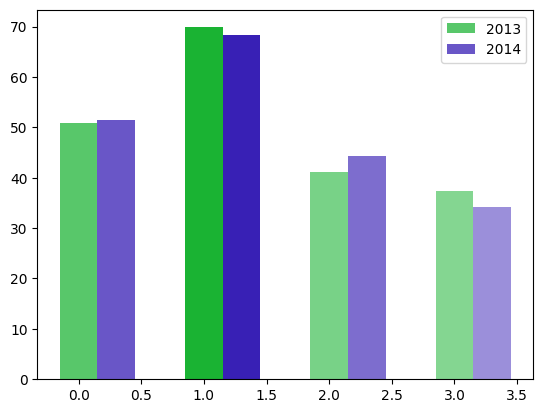

In [107]:
index = np.arange(4)
fig, ax = plt.subplots()
rects1 = ax.bar(index, heights, .3,
                color = colors,
                label='2013')
rects2 = ax.bar(index+.3, heights14, .3,
                color=colors14,
                label='2014')
ax.legend()
plt.show()

In [108]:
# %load ../helper_funcs/table_helpers.py
def max_temp(s):
    return s[s['Air_Temp']==s['Air_Temp'].max()]

def min_temp(s):
    return s[s['Air_Temp']==s['Air_Temp'].min()]


def min_max_temps(yr):
    return [(max_temp(s)['Air_Temp'].values[0],
             max_temp(s)['date'].values[0],
             min_temp(s)['Air_Temp'].values[0],
             min_temp(s)['date'].values[0]
            ) for s in get_seasons(yr)]

In [109]:
seasons = ["Spring","Summer","Fall","Winter"]
heights = [season['Air_Temp'].mean() for season in get_seasons('2013')]

## Set a different alpha(opacity) corresponding to value of average temperature

In [110]:
alphas = [height/max(heights) for height in heights]
colors = [(.1,.7,.2,a) for a in alphas]

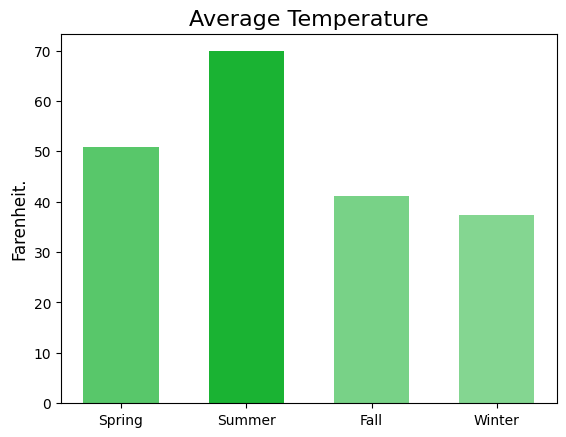

In [111]:
plt.bar(seasons,heights,.6,align='center',color=colors)
plt.title('Average Temperature',fontsize=16)
plt.ylabel('Farenheit.',fontsize=12)
plt.show()

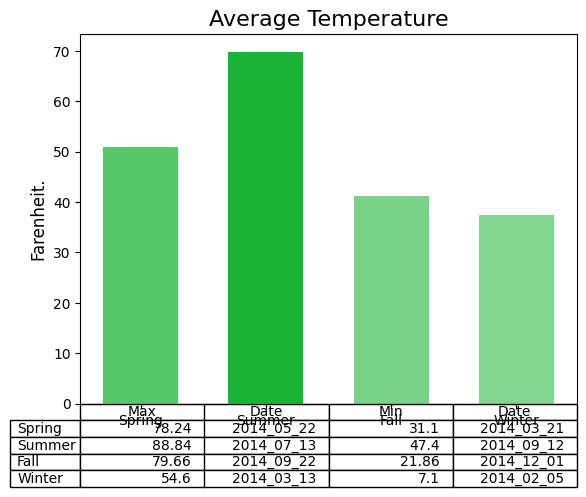

In [112]:
plt.bar(seasons,heights,.6,align='center',color=colors)
plt.title('Average Temperature',fontsize=16)
plt.ylabel('Farenheit.',fontsize=12)
rows = ["Spring","Summer","Fall","Winter"]
columns = ["Max","Date","Min","Date"]
plt.table(cellText=min_max_temps('2014'),
         rowLabels=rows,
         colLabels=columns)
plt.show()

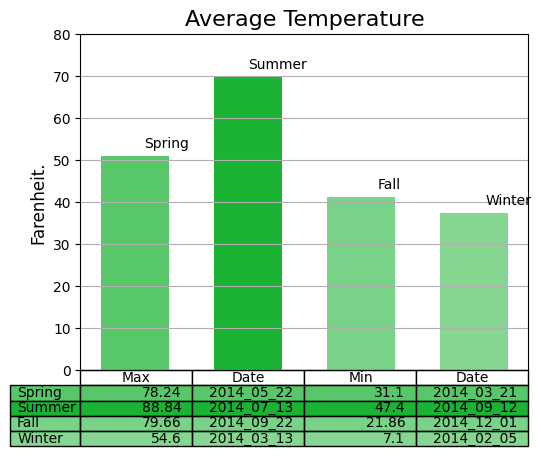

In [113]:
plt.bar(seasons,heights,.6,align='center',color=colors)
plt.title('Average Temperature',fontsize=16)
plt.ylabel('Farenheit.',fontsize=12)
rows = ["Spring","Summer","Fall","Winter"]
columns = ["Max","Date","Min","Date"]
plt.table(cellText=min_max_temps('2014'),
         rowLabels=rows,
         colLabels=columns,
         rowColours=colors,
         cellColours=[[c]*4 for c in colors],
         loc='bottom')
plt.xticks([])
[plt.text(i,h+2,s) for i,h,s in zip([.08,1,2.15,3.1],heights,seasons)]
plt.ylim(0,80)
plt.subplots_adjust(left=0.2, bottom=.1,top=.8)
plt.grid(True)
plt.show()